In [90]:
import ChannelAttribution as ca

from pathlib import Path
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_file = Path.cwd() / "data" / "attribution data.csv"

In [43]:
data = pd.read_csv(data_file)
data.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [44]:
data = data.sort_values(['cookie', 'time'], ascending = True)
data['visit_order'] = data.groupby('cookie').cumcount() + 1

In [64]:
path_data= data.groupby('cookie')['channel'].aggregate(lambda x: x.unique().tolist()).reset_index()
path_data.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]"
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search]
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search]
3,00073CFE3FoFCn70fBhB3kfon,[Instagram]
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search]


In [66]:
last_interaction_data = data.drop_duplicates('cookie', keep='last')[['cookie', 'conversion', 'conversion_value']]
last_interaction_data

,cookie,conversion,conversion_value
3,00000FkCnDfDDf0iC97iC703B,0,0.0
9,0000nACkD9nFkBBDECD3ki00E,0,0.0
14,0003EfE37E93D0BC03iBhBBhF,0,0.0
15,00073CFE3FoFCn70fBhB3kfon,0,0.0
16,00079hhBkDF3k3kDkiFi9EFAD,0,0.0
...,...,...,...
586729,ooooE0hkAFBkED90ChDDiBFAf,0,0.0
586730,ooooEBE0o0D97ACAAAnDoi3F0,0,0.0
586733,ooooEiB0CCoEf9fiiC90Dfhfk,0,0.0
586735,ooooiBh70D3k3BfAhDFfii9h7,0,0.0


In [67]:
attr_paths = pd.merge(path_data, last_interaction_data, how = 'left', on = 'cookie')
attr_paths

,cookie,channel,conversion,conversion_value
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0,0.0
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0,0.0
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0,0.0
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0,0.0
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0,0.0
...,...,...,...,...
240103,ooooE0hkAFBkED90ChDDiBFAf,[Online Display],0,0.0
240104,ooooEBE0o0D97ACAAAnDoi3F0,[Online Display],0,0.0
240105,ooooEiB0CCoEf9fiiC90Dfhfk,[Online Display],0,0.0
240106,ooooiBh70D3k3BfAhDFfii9h7,"[Paid Search, Online Video]",0,0.0


In [68]:
def list_to_string(data):  
    str1 = ""  
    for i in data['channel']:  
        str1 += i + ' > '    
    return str1[:-3]
attr_paths['path'] = attr_paths.apply(list_to_string, axis = 1)

In [69]:
attr_paths

,cookie,channel,conversion,conversion_value,path
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0,0.0,Instagram > Online Display
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0,0.0,Paid Search
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0,0.0,Paid Search
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0,0.0,Instagram
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0,0.0,Paid Search
...,...,...,...,...,...
240103,ooooE0hkAFBkED90ChDDiBFAf,[Online Display],0,0.0,Online Display
240104,ooooEBE0o0D97ACAAAnDoi3F0,[Online Display],0,0.0,Online Display
240105,ooooEiB0CCoEf9fiiC90Dfhfk,[Online Display],0,0.0,Online Display
240106,ooooiBh70D3k3BfAhDFfii9h7,"[Paid Search, Online Video]",0,0.0,Paid Search > Online Video


In [70]:
attr_paths.drop(columns = ['cookie', 'channel'], inplace = True)
attr_paths['null'] = np.where(attr_paths['conversion'] == 0,1,0)

attribution_data = attr_paths.groupby(['path'], as_index = False).sum()
attribution_data.rename(columns={"conversion": "total_conversions", "null": "total_null", "conversion_value": "total_conversion_value"}, inplace = True)
attribution_data.sample(10)

,path,total_conversions,total_conversion_value,total_null
88,Instagram > Online Video > Paid Search,3,22.5,30
200,Online Video > Paid Search > Instagram > Online Display > Facebook,0,0.0,1
66,Instagram > Facebook > Paid Search > Online Display,3,18.0,18
63,Instagram > Facebook > Online Video > Paid Search,2,13.0,24
243,Paid Search > Online Display > Online Video > Facebook > Instagram,1,8.0,0
116,Online Display > Facebook > Paid Search > Online Video > Instagram,0,0.0,1
185,Online Video > Online Display > Instagram,2,10.0,9
162,Online Video > Facebook > Paid Search,15,97.0,66
216,Paid Search > Facebook > Online Video,13,80.5,108
138,Online Display > Online Video > Paid Search > Facebook > Instagram,0,0.0,2


# Heuristic models

In [ ]:
heuristic = ca.heuristic_models(attribution_data, 'path', 'total_conversions', var_value = 'total_conversion_value')
heuristic

,channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value
0,Facebook,5177.0,32283.0,4690.0,29334.0,4947.600000,30910.008333
1,Instagram,2329.0,14579.5,2868.0,17939.0,2627.100000,16442.758333
2,Online Display,2160.0,13419.0,2144.0,13326.0,2143.600000,13324.466667
3,Online Video,3216.0,20225.5,3201.0,20123.0,3192.183333,20066.175000
4,Paid Search,4757.0,29724.0,4736.0,29509.0,4728.516667,29487.591667


# Markov models

In [86]:
markov = ca.markov_model(attribution_data, 'path', 'total_conversions', var_value = 'total_conversion_value')
markov

Number of simulations: 100000 - Convergence reached: 1.53% < 5.00%
Percentage of simulated paths that successfully end before maximum number of steps (6) is reached: 99.92%


,channel_name,total_conversions,total_conversion_value
0,Facebook,5041.601678,31529.877153
1,Instagram,3173.461014,19843.395889
2,Online Display,2149.550820,13370.886367
3,Online Video,2903.941428,18234.624666
4,Paid Search,4370.445060,27252.215925


In [92]:
model = pd.merge(heuristic, markov,on="channel_name", how="inner")

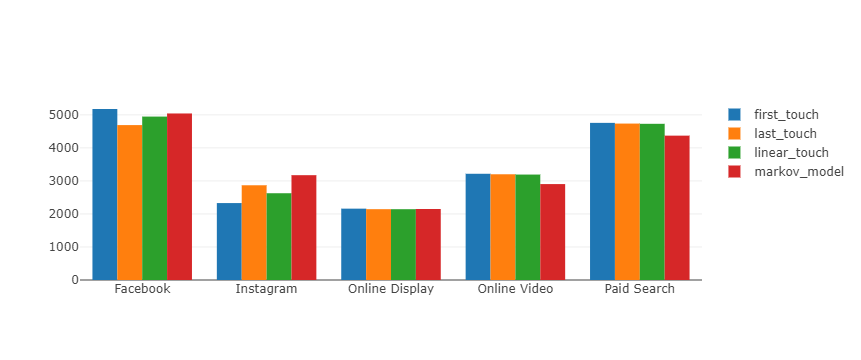

In [97]:
attr_conv = model[["channel_name", "first_touch_conversions", "last_touch_conversions", "linear_touch_conversions", "total_conversions"]]
attr_conv.columns=["channel_name", "first_touch", "last_touch", "linear_touch", "markov_model"]

attr_conv=pd.melt(attr_conv, id_vars="channel_name")

viz_data = [dict(type = "histogram", histfunc="sum",x = attr_conv.channel_name, y = attr_conv.value,
             transforms = [dict(type = "groupby", groups = attr_conv.variable,)],)]

fig = dict({"data":viz_data}) 
pio.show(fig, validate=False)

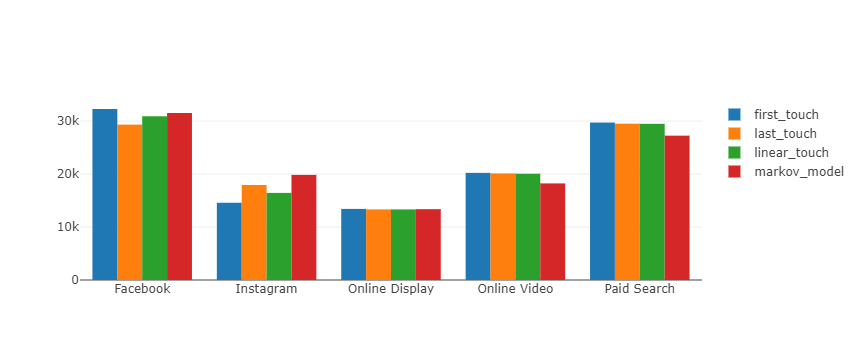

In [99]:
attr_value=model[["channel_name", "first_touch_value", "last_touch_value", "linear_touch_value", "total_conversion_value"]]
attr_value.columns=["channel_name", "first_touch", "last_touch", "linear_touch", "markov_model"]

attr_value=pd.melt(attr_value, id_vars="channel_name")
viz_data = [dict(type = "histogram", histfunc="sum", x = attr_value.channel_name, y = attr_value.value,
             transforms = [dict(type = "groupby",groups = attr_value.variable,)],)]

fig = dict({"data":viz_data})
pio.show(fig,validate=False)

In [101]:
transition_matrix = ca.transition_matrix(attribution_data, "path", "total_conversions", var_null="total_null")
transition_matrix

{'channels':    id_channel    channel_name
 0           1        Facebook
 1           2       Instagram
 2           3  Online Display
 3           4    Online Video
 4           5     Paid Search,
 'transition_matrix':    channel_from    channel_to  transition_probability
 0       (start)             1                0.278408
 1       (start)             2                0.119188
 2       (start)             3                0.142644
 3       (start)             4                0.142361
 4       (start)             5                0.317399
 5             1  (conversion)                0.053220
 6             1        (null)                0.673123
 7             1             2                0.173072
 8             1             3                0.024352
 9             1             4                0.025577
 10            1             5                0.050655
 11            2  (conversion)                0.057979
 12            2        (null)                0.629786
 13       

In [102]:
matrix = transition_matrix['transition_matrix']
matrix

,channel_from,channel_to,transition_probability
0,(start),1,0.278408
1,(start),2,0.119188
2,(start),3,0.142644
3,(start),4,0.142361
4,(start),5,0.317399
...,...,...,...
30,5,(conversion),0.053309
31,5,3,0.048053
32,5,4,0.029221
33,5,2,0.034196


In [103]:
matrix = pd.pivot_table(matrix, values='transition_probability', index=['channel_from'],
                    columns=['channel_to'], aggfunc=np.sum)
matrix

channel_to,(conversion),(null),1,2,3,4,5
channel_from,,,,,,,
(start),NaN,NaN,0.278408,0.119188,0.142644,0.142361,0.317399
1,0.053220,0.673123,NaN,0.173072,0.024352,0.025577,0.050655
2,0.057979,0.629786,0.218777,NaN,0.023531,0.024118,0.045809
3,0.050324,0.756643,0.053986,0.029363,NaN,0.017299,0.092386
4,0.078146,0.763757,0.059323,0.031908,0.018920,NaN,0.047947
5,0.053309,0.770779,0.064442,0.034196,0.048053,0.029221,NaN


In [105]:
column_dict = transition_matrix['channels'].set_index('id_channel')['channel_name'].to_dict()
keys_values = column_dict.items()
column_dict = {str(key): str(value) for key, value in keys_values}

matrix = matrix.rename(mapper=column_dict, axis=1).rename(mapper=column_dict, axis=0)
matrix.fillna(0, inplace = True)
matrix

channel_to,(conversion),(null),Facebook,Instagram,Online Display,Online Video,Paid Search
channel_from,,,,,,,
(start),0.000000,0.000000,0.278408,0.119188,0.142644,0.142361,0.317399
Facebook,0.053220,0.673123,0.000000,0.173072,0.024352,0.025577,0.050655
Instagram,0.057979,0.629786,0.218777,0.000000,0.023531,0.024118,0.045809
Online Display,0.050324,0.756643,0.053986,0.029363,0.000000,0.017299,0.092386
Online Video,0.078146,0.763757,0.059323,0.031908,0.018920,0.000000,0.047947
Paid Search,0.053309,0.770779,0.064442,0.034196,0.048053,0.029221,0.000000


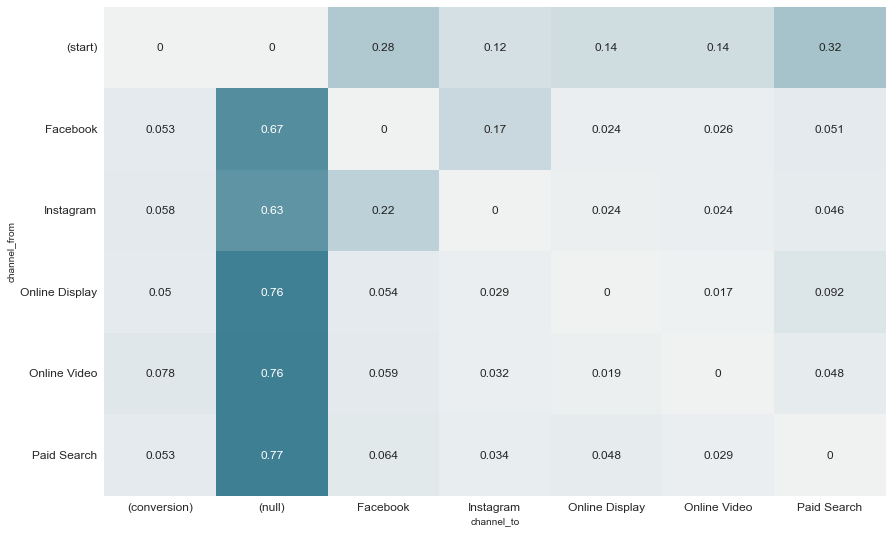

In [109]:
fig = plt.figure(figsize = (14,9))
sns.heatmap(matrix, cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0,\
            annot_kws={'size':12}, cbar=False)
plt.yticks(rotation=0, fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()